# Bibliotecas

In [58]:
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
import  os
import  pandas as  pd

# Explorando funcionamento do shapely

<AxesSubplot:>

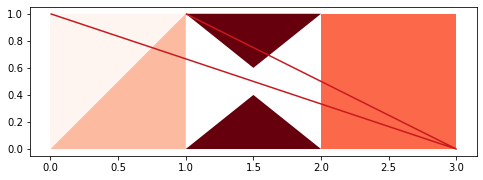

In [59]:
p1 = Polygon([(0,0),(1,0),(1,1),(0,1)])
p2 = Polygon([(0,0),(1,0),(1,1)])
p3 = Polygon([(2,0),(3,0),(3,1),(2,1)])

p4 = LineString([(0,1),(3,0),(1,1)])

p6=Polygon([(1,0),(1.5,0.4),(2,0)])
p7=Polygon([(1,1),(1.5,0.6),(2,1)])

p8=MultiPolygon([p6,p7])
g = gpd.GeoSeries([p1,p2,p3,p4,p8])
g.plot(cmap='Reds',figsize=(8,12))

É possivel desenhar diversas figuras geometricas  passando suas coordenadas

# Explorando o GeoPandas

## Base de dados

In [60]:
rj = gpd.read_file('Dados/Mapas/RJ/33MUE250GC_SIR.shp')

In [61]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


## Plotando o mapa

<AxesSubplot:>

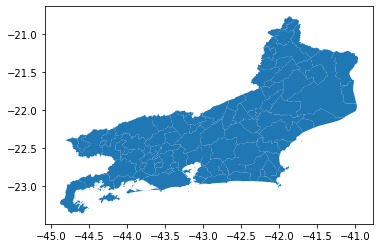

In [62]:
rj.plot()

<AxesSubplot:>

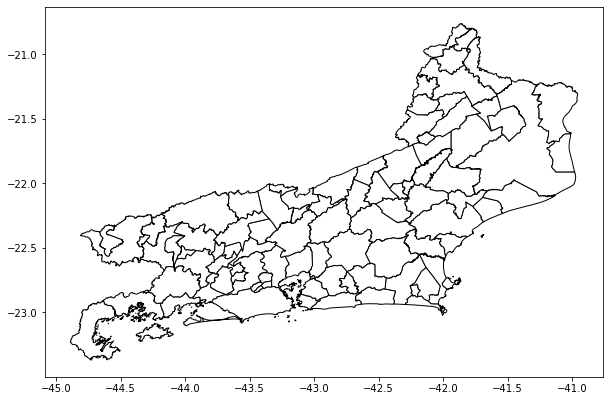

In [63]:
rj.plot(color='w', edgecolor='k', figsize=(10,14))

# Criando Shapefiles

## Modificando o gpd

In [64]:
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


<AxesSubplot:>

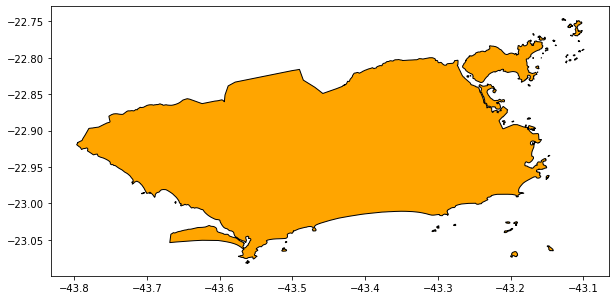

In [65]:
rj.plot(color='orange', edgecolor='k', figsize=(10,14))

In [66]:
dir = 'Dados/Mapas/RJ/RJ_MUNICIO'

In [67]:
if not os.path.exists(dir):
    os.makedirs(dir)

In [68]:
rj.to_file(dir +'/RJ_MUNICIPIO.shp')

In [69]:
rj_municipio = gpd.read_file('Dados/Mapas/RJ/RJ_MUNICIO/RJ_MUNICIPIO.shp')
rj_municipio

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


## Transformando df em gdf

In [70]:
dados = pd.read_table('Dados/dados.txt')
dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000


CRS(Coordinate Reference System) é um padrão de escrita para dados de localização.
https://en.wikipedia.org/wiki/Spatial_reference_system

In [71]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(dados,crs=crs,geometry=geometry)

In [72]:
dir = 'Dados/Mapas/RJ-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)
geo_dados.to_file(dir + '/DATASET.shp')

Mais fontes sobre referencias  espaciais e CRS  
https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html  
 http://www.spatialreference.org/

## Equalizando CRS

In [73]:
rj.crs

{'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': True, 'wktext': True}

In [74]:
geo_dados.crs

{'proj': 'latlong',
 'ellps': 'WGS84',
 'datum': 'WGS84',
 'no_defs': True,
 'wktext': True}

In [75]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [76]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Seleçao de pontos dentro de uma região

In [77]:
in_rj = geo_dados['geometry'].within(rj.iloc[0].geometry)

In [78]:
geo_dados = geo_dados[in_rj]

<AxesSubplot:>

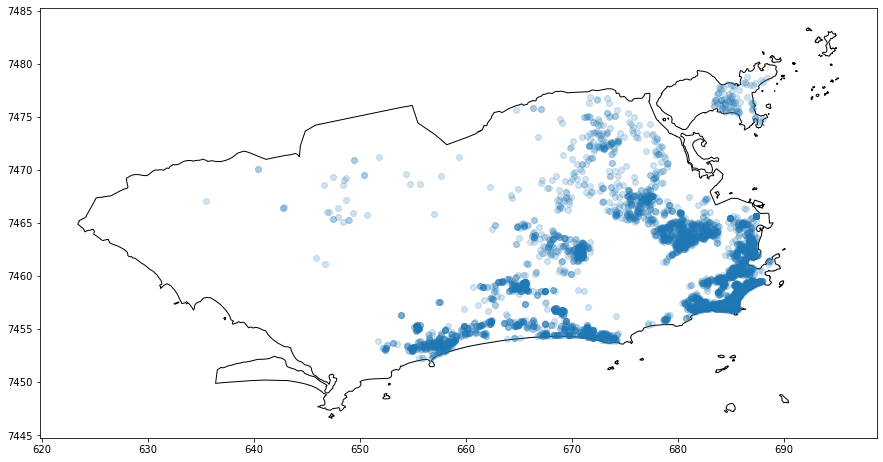

In [79]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.2)

In [80]:
geo_dados.to_file(dir + '/DATASET.shp')

# Calcular distancias

## Adicionando dataset de estações de metrô

Fonte: https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [81]:
metro = gpd.read_file('Dados/Transporte/Metrô/Estações_Metrô.geojson')

In [82]:
metro.crs

{'init': 'epsg:4326'}

In [83]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

Tem um erro na biblioteca pyproj e ela precisa ser substituida paa converte o crs do metro.

1º Instalar a Cython biblioteca que o anaconda não baixa junto quando fazemos a instalação do GeoPandas

conda install -c anaconda cython

2º Baixar a correção em:

https://github.com/Jens-R-Pedersen/pyproj

3º Substituir a pasta C:\ProgramData\Anaconda3\Lib\site-packages\pyproj com a pasta data do arquivo baixado no passo 2. E renomear a pasta data para proj .

4º Criar uma variável de ambiente local PROJ_LIB com o caminho da pasta C:\ProgramData\Anaconda3\Lib\site-packages\pyproj \proj .


Solução encontrada por Ivan Oliveira em: https://github.com/pyproj4/pyproj/issues/134

<AxesSubplot:>

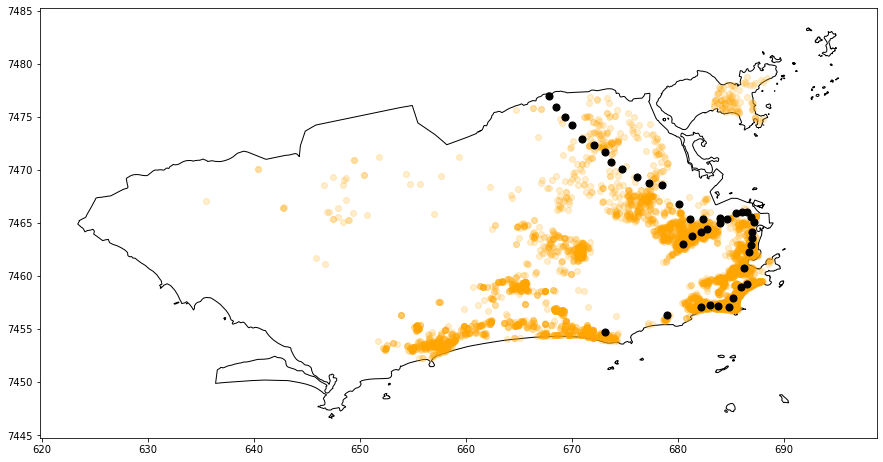

In [84]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)

In [85]:
distances = metro.distance(geo_dados.iloc[0].geometry)

In [86]:
distances.min()

15.62293882499506

In [87]:
geo_dados['Distancia_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

Coeficiente de correlação entre o valor do imovel e a distancia do metro:

In [88]:
coef = geo_dados['Valor'].corr(geo_dados['Distancia_Metro'])

# Adicionando outros modais de transporte

Fontes:

Trens - http://opendata.arcgis.com/datasets/f753941f44a749d4987f1111aa6486b3_22.geojson

BRT - http://opendata.arcgis.com/datasets/8c9f264be1e946b1b49cf46198bd5e46_16.geojson

## Trem:

In [89]:
trem = gpd.read_file('Dados/Transporte/Trem/Estações_Trem.geojson')
trem = trem.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

#tirando os dados e trem de fora da cidade
trem = trem[trem.within(rj.iloc[0].geometry)]


<AxesSubplot:>

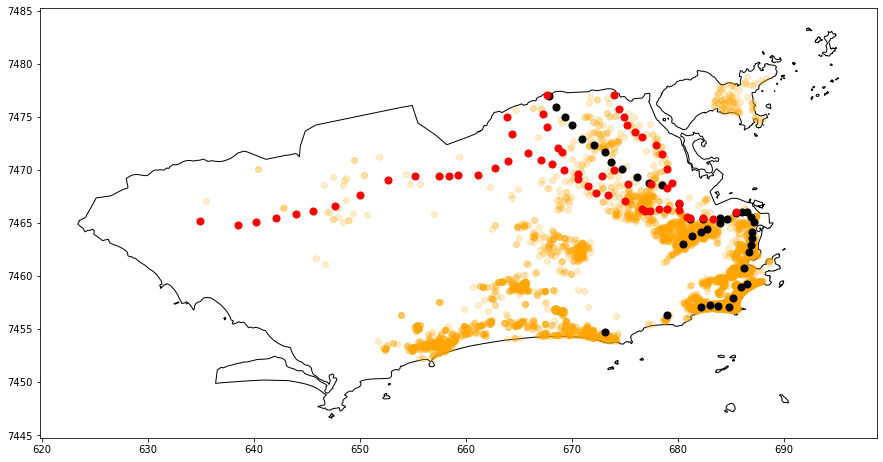

In [90]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)

## BRT:

In [91]:
brt = gpd.read_file('Dados/Transporte/BRT/Estações_BRT.geojson')
brt = brt.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')


<AxesSubplot:>

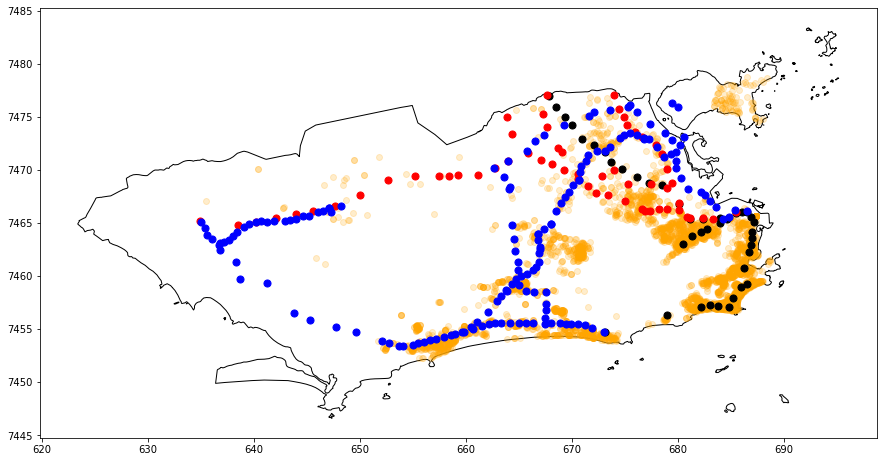

In [92]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, color='orange', alpha=0.2)
metro.plot(ax=base, color='black', markersize= 50)
trem.plot(ax=base, color='red', markersize= 50)
brt.plot(ax=base, color='blue', markersize= 50)

In [93]:
transporte = pd.concat([trem.geometry, metro.geometry, brt.geometry], ignore_index = True)

In [94]:
geo_dados['Distancia_Transporte'] = geo_dados['geometry'].apply(lambda x: transporte.distance(x).min())

In [95]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Distancia_Metro,Distancia_Transporte
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939,0.443193
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741,3.642787
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973,0.641470
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039,0.422370
5,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159,0.214605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,POINT (648.664 7469.216),20.667831,2.129366
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,POINT (655.010 7452.944),18.189134,0.563492
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,POINT (683.909 7459.848),2.180300,2.180300
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,POINT (678.393 7464.417),2.558248,1.871081


In [97]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Distancia_Metro,Distancia_Transporte
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653
Distancia_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040
Distancia_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000


In [98]:
coef_transportes = geo_dados['Valor'].corr(geo_dados['Distancia_Transporte'])
coef_transportes

-0.10365283748644949

# Distancia até a praia:


Fonte: http://www.data.rio/datasets/a22768dc645043f5bdfd1affab888ded_0

In [101]:
praias = gpd.read_file('Dados/Vegetação e Uso do Solo/Cobertura_Vegetal_e_Uso_da_Terra_2016.geojson')
praias = praias.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<AxesSubplot:>

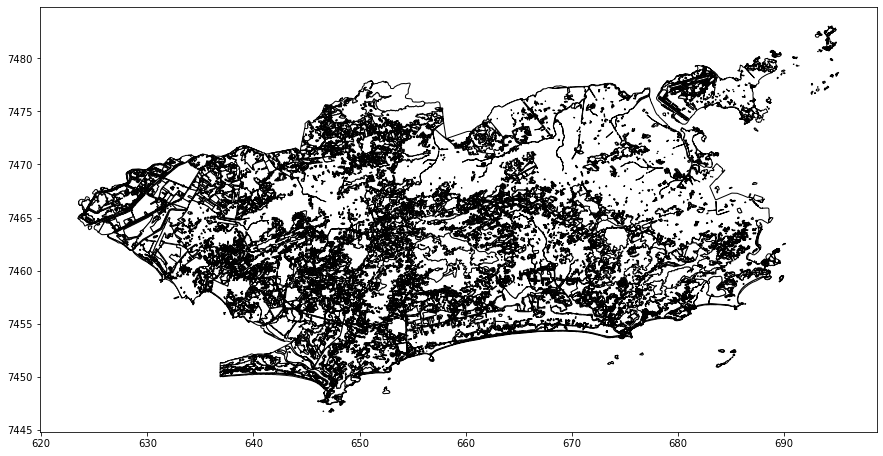

In [104]:
praias.plot(color='white', edgecolor='black', figsize=(15,8))

In [105]:
praias['legenda'].value_counts()

Vegetação arbórea não florestal                                     3495
Vegetação gramíneo-lenhosa                                          2022
Floresta Ombrófila Densa, Estágio Inicial                            643
Áreas Urbanas                                                        639
Afloramento Rochoso                                                  474
Uso agrícola, Lavoura Permanente                                     445
Floresta Ombrófila Densa, Estágio Médio                              414
Corpos d’água continentais                                           388
Reflorestamento                                                      252
Formação Pioneira com influência flúvio-lacustre, Brejo herbáceo     210
Uso agrícola, Lavoura Temporária                                     164
Formação Pioneira com influência flúvio-marinha, Manguezal           161
Solo exposto                                                         152
Formação Pioneira com influência flúvio-marinha, Ca

In [106]:
praias = praias[praias['legenda'] == 'Praia']

<AxesSubplot:>

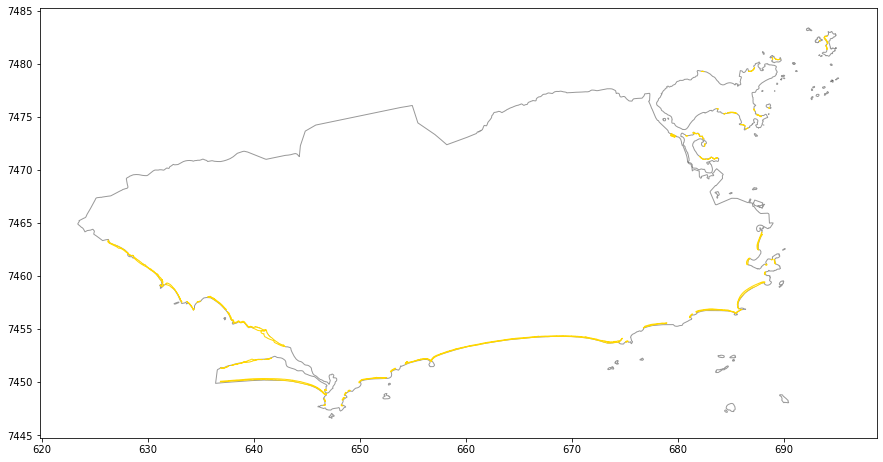

In [111]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8), alpha=0.4)
praias.plot(ax=base, color='white', edgecolor='gold')

## Distancia entre ponto e poligono

In [113]:
geo_dados['Distancia_Praia'] = geo_dados['geometry'].apply(lambda x: praias.distance(x).min())

In [114]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Distancia_Metro,Distancia_Transporte,Dist_Praia,Distancia_Praia
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671,-0.042684,-0.290745,-0.290745
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864,0.358735,0.560701,0.560701
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788,-0.031812,-0.317743,-0.317743
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794,-0.014628,-0.185829,-0.185829
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521,0.006363,-0.196554,-0.196554
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787,0.070240,-0.104570,-0.104570
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641,-0.103653,-0.361519,-0.361519
Distancia_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000,0.261040,0.187805,0.187805
Distancia_Transporte,-0.042684,0.358735,-0.031812,-0.014628,0.006363,0.070240,-0.103653,0.261040,1.000000,0.230641,0.230641
Dist_Praia,-0.290745,0.560701,-0.317743,-0.185829,-0.196554,-0.104570,-0.361519,0.187805,0.230641,1.000000,1.000000
